In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import seaborn as sns
from matplotlib import rcParams

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from itertools import chain, combinations
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV


In [4]:
df = pd.read_csv("/Users/harishsrinivasan/Downloads/stout/loans_full_schema.csv")

In [5]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [6]:
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


# Data Preprocessing

In [7]:
# Checking null values in columns
df.isnull().sum().sort_values(ascending=False)

verification_income_joint           8545
debt_to_income_joint                8505
annual_income_joint                 8505
months_since_90d_late               7715
months_since_last_delinq            5658
months_since_last_credit_inquiry    1271
emp_title                            833
emp_length                           817
num_accounts_120d_past_due           318
debt_to_income                        24
installment                            0
num_mort_accounts                      0
account_never_delinq_percent           0
tax_liens                              0
public_record_bankrupt                 0
loan_purpose                           0
application_type                       0
loan_amount                            0
term                                   0
interest_rate                          0
grade                                  0
delinq_2y                              0
sub_grade                              0
issue_month                            0
loan_status     

In [19]:
# Checking types for data columns
df.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

## Exploratory Data Analysis

In [110]:
lst1 = df.groupby(['state'])['loan_amount'].mean().values.tolist()
lst2 = df.groupby(['state'])['loan_amount'].mean().keys().tolist()

In [111]:
df_state_loan = pd.DataFrame(list(zip(lst1, lst2)),
              columns=['Mean Loan Amount', 'state'])

In [115]:
lst3 = df.groupby(['state'])['interest_rate'].mean().values.tolist()

In [158]:
df_state_intr = pd.DataFrame(list(zip(lst3, lst2)),
              columns=['Mean Interest Rate', 'state'])

In [170]:
df.groupby(['state'])['loan_amount'].mean().keys()

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY'],
      dtype='object', name='state')

In [114]:
fig = px.choropleth(df_state_loan,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Mean Loan Amount',
                    color_continuous_scale="Viridis_r", 
                    )
fig.update_layout(
      title_text = 'Mean Loan Amount by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

In [159]:
fig = px.choropleth(df_state_intr,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Mean Interest Rate',
                    color_continuous_scale="Viridis_r", 
                    )
fig.update_layout(
      title_text = 'Mean Interest Rate by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

/Users/harishsrinivasan/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



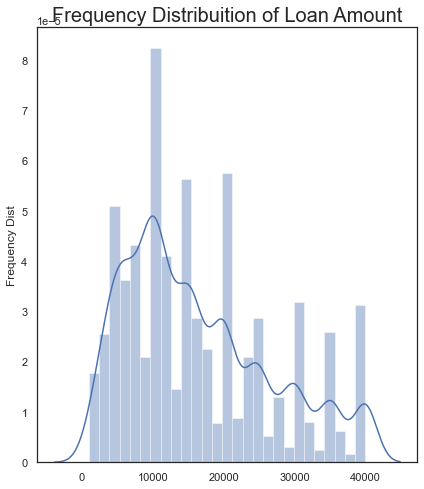

In [160]:
plt.figure(figsize=(15,8))

plt.subplot(121)
g = sns.distplot(df["loan_amount"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition of Loan Amount", fontsize=20)
plt.savefig("/Users/harishsrinivasan/Desktop/UTD/Code/Stout-Case-Study-1/images/loanfreq.png")

/Users/harishsrinivasan/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Frequency Distribuition of interest rate')

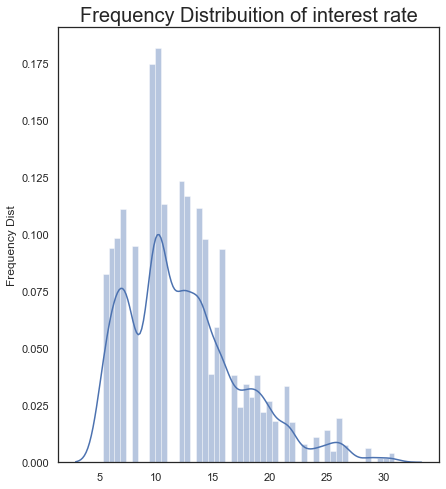

In [137]:
plt.figure(figsize=(15,8))

plt.subplot(121)
g = sns.distplot(df["interest_rate"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition of interest rate", fontsize=20)
plt.savefig("/Users/harishsrinivasan/Desktop/UTD/Code/Stout-Case-Study-1/images/intfreq.png")

Text(0.5, 1.0, 'Interest Rate Normal Distribuition')

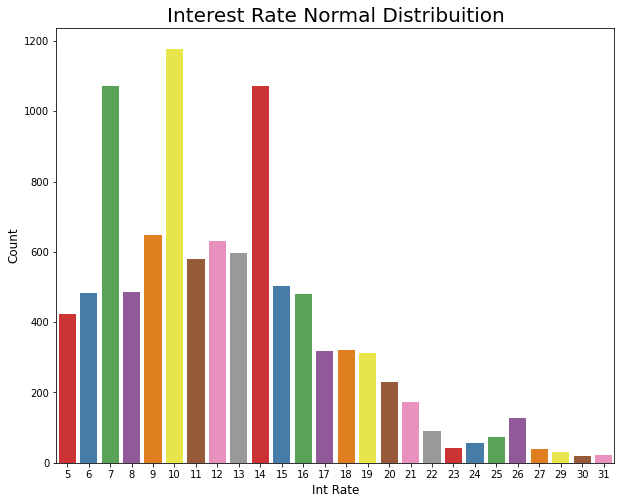

In [94]:
df['int_round'] = df['interest_rate'].round(0).astype(int)

plt.figure(figsize = (10,8))
g1 = sns.countplot(x="int_round",data=df, 
                   palette="Set1")
g1.set_xlabel("Int Rate", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Interest Rate Normal Distribuition", fontsize=20)

Text(0.5, 1.0, 'Loan Status Count')

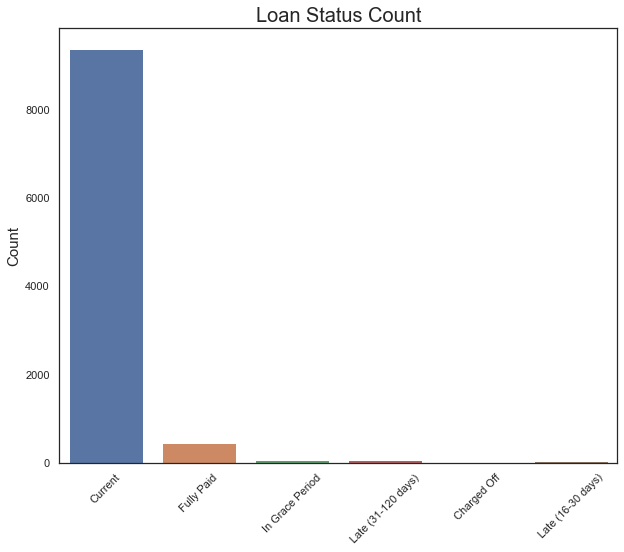

In [138]:
plt.figure(figsize = (10,8))
g = sns.countplot(x="loan_status", data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count", fontsize=20)

In [123]:
loanpurp = pd.DataFrame()
loanpurp = df.groupby(['term','loan_purpose']).size().sort_values()
loanp = loanpurp.unstack()
loanp

loan_purpose,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation
term,,,,,,,,,,,,
36,101,1690,3377,459,95,219,130,54,697,6,85,57
60,30,559,1767,221,56,84,32,15,217,4,40,5


<AxesSubplot:title={'center':'Total Loan by term & Loan Purpose'}, xlabel='term', ylabel='loan_purpose'>

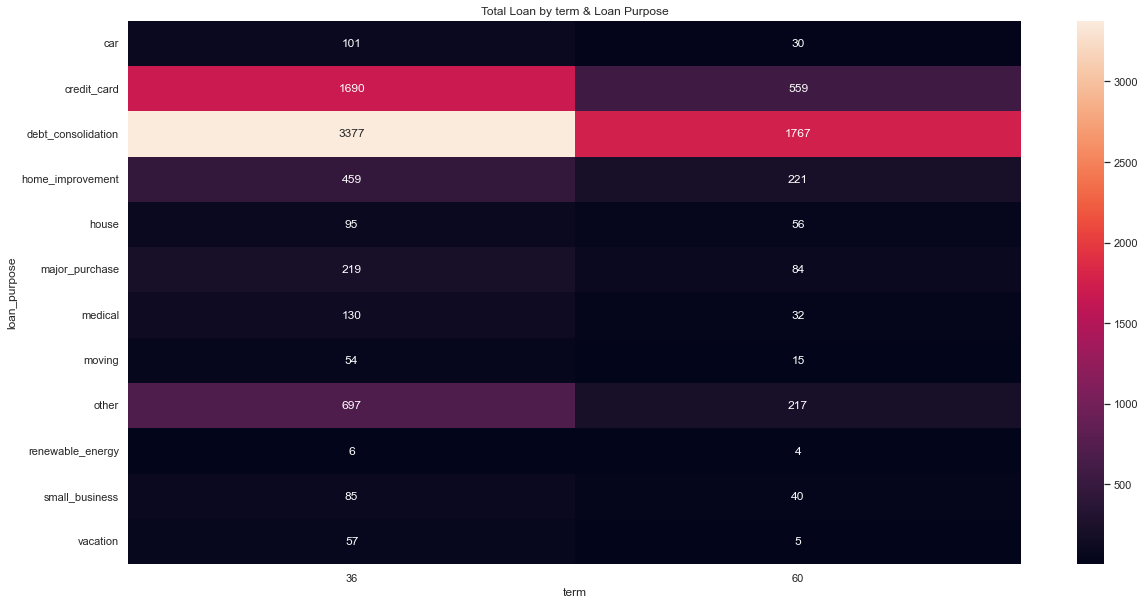

In [124]:
sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Total Loan by term & Loan Purpose')
ax =sns.heatmap(loanp.T,mask= loanp.T.isnull(),annot=True,fmt='g');
ax


Text(0.5, 1.0, 'Loan purpose count')

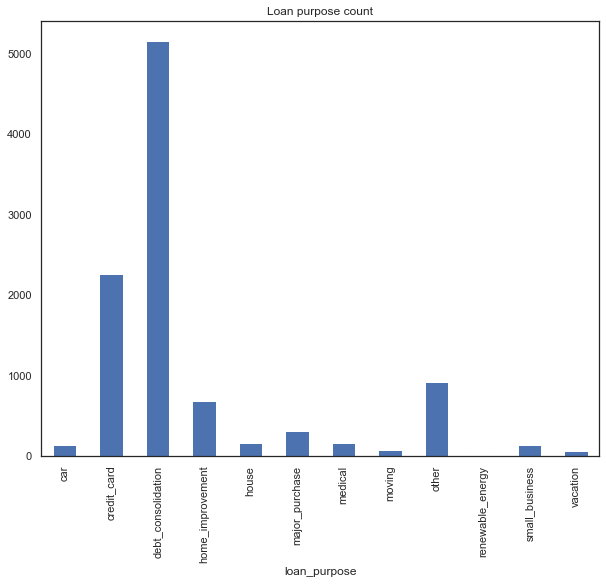

In [126]:
loans_by_purpose = df.groupby('loan_purpose')
plt.figure(figsize = (10,8))
loans_by_purpose['loan_purpose'].count().plot(kind='bar')
plt.title("Loan purpose count")

Text(0.5, 1.0, 'Interest Rate by Homeownership')

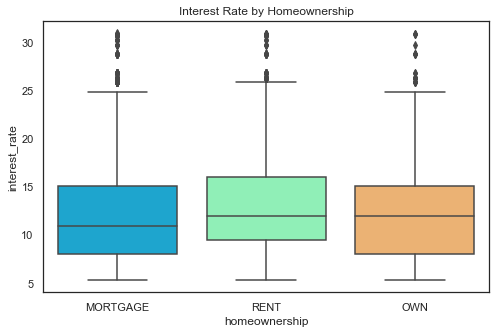

In [133]:
plt.figure(figsize=(8,5))
sns.boxplot(x='homeownership',y='interest_rate',data=df2, palette='rainbow')
plt.title("Interest Rate by Homeownership")

Text(0.5, 1.0, 'Interest Rate by Verified Income')

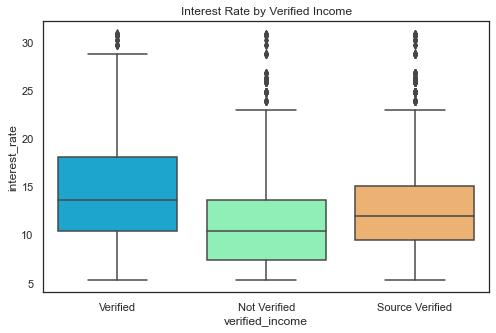

In [139]:
plt.figure(figsize=(8,5))
sns.boxplot(x='verified_income',y='interest_rate',data=df2, palette='rainbow')
plt.title("Interest Rate by Verified Income")

Text(0.5, 1.0, 'Interest Rate by verification_income_joint')

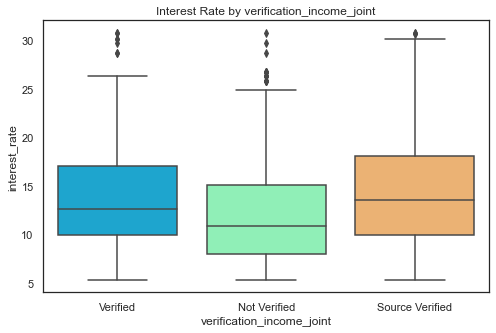

In [140]:
#df_1 = df['verified_income_joint'].dropna()

plt.figure(figsize=(8,5))
sns.boxplot(x='verification_income_joint',y='interest_rate',data=df2, palette='rainbow')
plt.title("Interest Rate by verification_income_joint")

Text(0.5, 1.0, 'Interest Rate by loan_purpose')

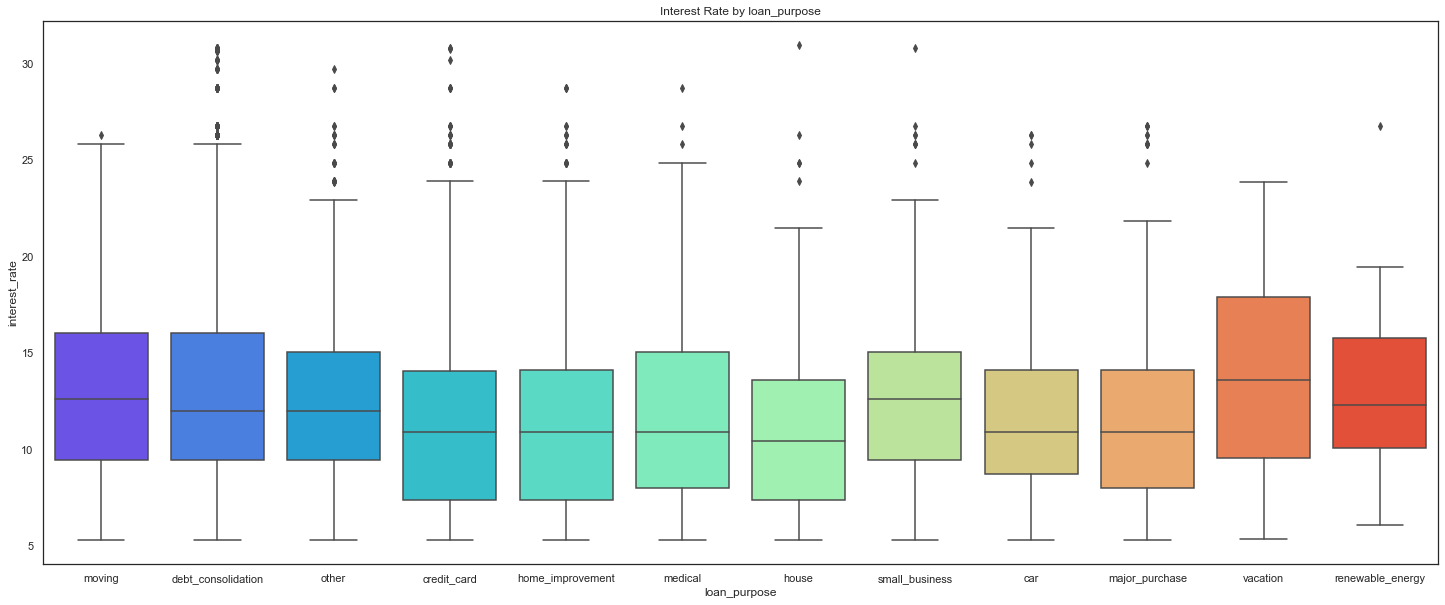

In [141]:
plt.figure(figsize=(25,10))
sns.boxplot(x='loan_purpose',y='interest_rate',data=df, palette='rainbow')
plt.title("Interest Rate by loan_purpose")

Text(0.5, 1.0, 'Interest Rate by public_record_bankrupt')

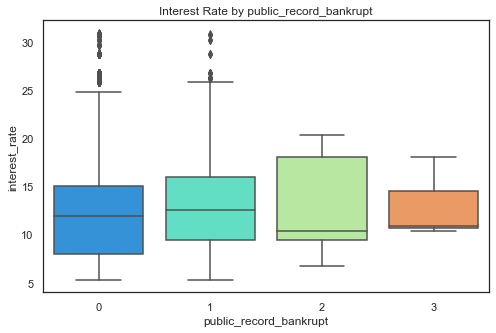

In [143]:
plt.figure(figsize=(8,5))
sns.boxplot(x='public_record_bankrupt',y='interest_rate',data=df2, palette='rainbow')
plt.title("Interest Rate by public_record_bankrupt")

Text(0.5, 1.0, 'loan_amount by public_record_bankrupt')

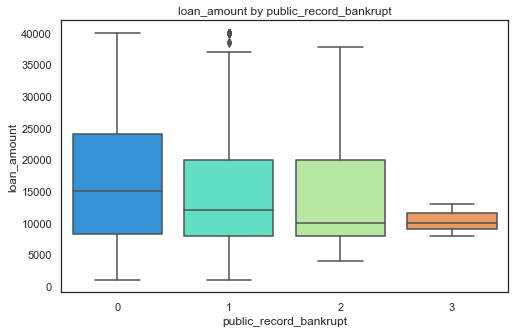

In [144]:

plt.figure(figsize=(8,5))
sns.boxplot(x='public_record_bankrupt',y='loan_amount',data=df, palette='rainbow')
plt.title("loan_amount by public_record_bankrupt")

## Data Preprocessing

In [128]:
# convert na values to 0 
nan_to_0_cols = ['emp_length', 'annual_income_joint', 'debt_to_income_joint', 'debt_to_income', 'months_since_last_delinq', 
                 'months_since_90d_late', 'months_since_last_credit_inquiry', 'num_accounts_120d_past_due']
df[nan_to_0_cols] = df[nan_to_0_cols].fillna(0)
#df1 = pd.get_dummies(df)

In [129]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,int_round
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0.0,NaN,0.00,...,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,14
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0.0,NaN,0.00,...,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,13
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0.0,NaN,0.00,...,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,17
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0.0,NaN,0.00,...,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,7
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0.0,NaN,0.00,...,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0,7
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,0.0,NaN,0.00,...,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0,19
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0,24
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0.0,NaN,0.00,...,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0,5


In [130]:
#removing unnecessary features before data manipulation
cols = ['emp_length', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
        'application_type',
       'interest_rate', 'installment',
       'balance', 'paid_total', 'paid_principal', 'paid_interest',
       'paid_late_fees']

In [131]:
#cols2 = ['homeownership', 'verified_income']
df2 = pd.DataFrame()
df2 = df[cols]
df3 = pd.get_dummies(df2)

In [132]:
df3

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,homeownership_OWN,homeownership_RENT,verified_income_Not Verified,verified_income_Source Verified,verified_income_Verified,verification_income_joint_Not Verified,verification_income_joint_Source Verified,verification_income_joint_Verified,application_type_individual,application_type_joint
0,3.0,90000.0,18.01,0.0,0.00,0,38.0,2001,6,28,...,0,0,0,0,1,0,0,0,1,0
1,10.0,40000.0,5.04,0.0,0.00,0,0.0,1996,1,30,...,0,1,1,0,0,0,0,0,1,0
2,3.0,40000.0,21.15,0.0,0.00,0,28.0,2006,4,31,...,0,1,0,1,0,0,0,0,1,0
3,1.0,30000.0,10.16,0.0,0.00,0,0.0,2007,0,4,...,0,1,1,0,0,0,0,0,1,0
4,10.0,35000.0,57.96,57000.0,37.66,0,0.0,2008,7,22,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,108000.0,22.28,0.0,0.00,0,0.0,2008,5,44,...,0,1,0,1,0,0,0,0,1,0
9996,8.0,121000.0,32.38,0.0,0.00,4,9.0,1994,1,28,...,0,0,0,0,1,0,0,0,1,0
9997,10.0,67000.0,45.26,107000.0,29.57,2,6.0,2004,0,18,...,0,0,0,0,1,0,1,0,0,1
9998,1.0,80000.0,11.99,0.0,0.00,0,0.0,1999,1,38,...,0,0,0,1,0,0,0,0,1,0


In [145]:
size = df3.shape[0]
rs = 1
Train, Test = train_test_split(df3, test_size= 0.2, random_state= rs)
CV, Test = train_test_split(Test, test_size=0.5, random_state = rs)
print(Train.shape, CV.shape, Test.shape)

(8000, 51) (1000, 51) (1000, 51)


In [146]:
Train_y = np.array(Train["interest_rate"])
CV_y = np.array(CV["interest_rate"])
Test_y = np.array(Test["interest_rate"])
Train_x = Train.drop(["interest_rate"], axis = 1)
CV_x = CV.drop(["interest_rate"], axis = 1)
Test_x = Test.drop(["interest_rate"], axis = 1)

/Users/harishsrinivasan/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 35811.43845283234, tolerance: 16.038648115243788

/Users/harishsrinivasan/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 35775.312906143845, tolerance: 16.038648115243788

/Users/harishsrinivasan/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 35553.51807686533, tolerance: 16.204237304111007

/Users/harishsrinivasan/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You mig

RMSE of Lasso:  3.539970882411501


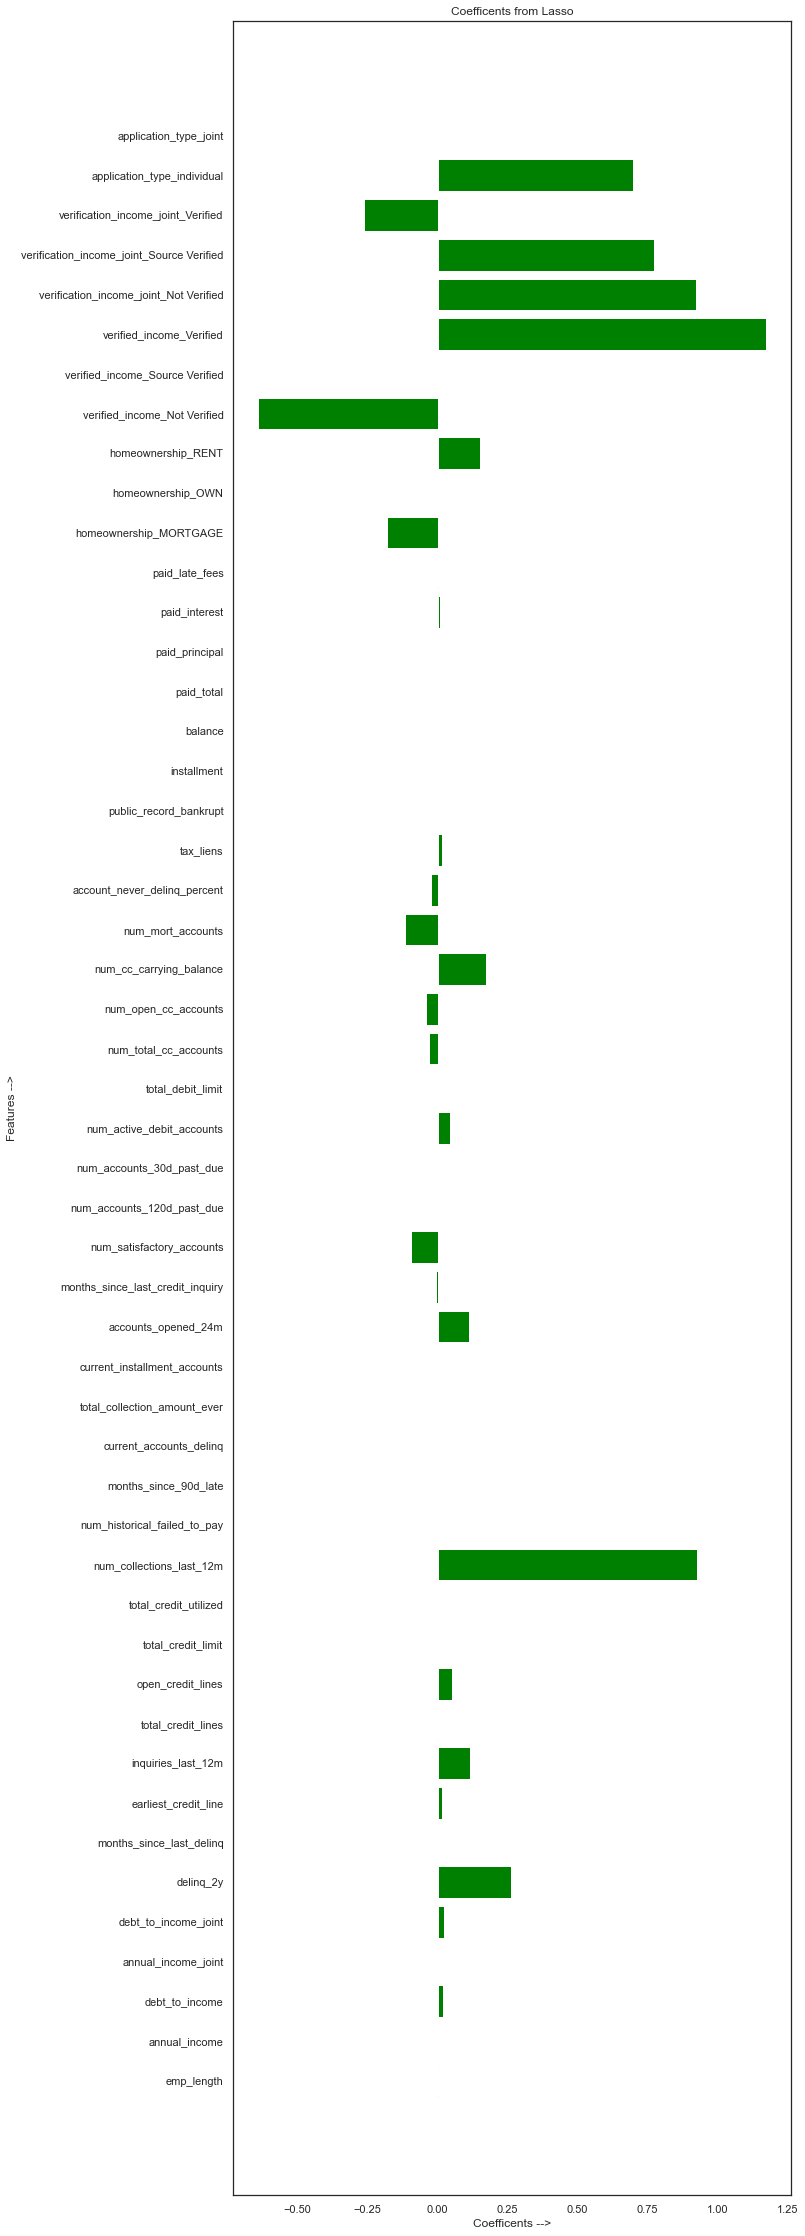

In [168]:
#lassocv for feature selection
modellasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0001, 10, 1000]).fit(Train_x, Train_y)
lassopred = modellasso.predict(CV_x)
print("RMSE of Lasso: ", np.sqrt(mean_squared_error(lassopred, CV_y)))

coeff = modellasso.coef_

x = list(Train_x)
x_pos = [i for i, _ in enumerate(x)]


plt.figure(figsize = (10,40))
plt.barh(x_pos, coeff, color='green')
plt.ylabel("Features -->")
plt.xlabel("Coefficents -->")
plt.title("Coefficents from Lasso")
plt.yticks(x_pos, x)
plt.savefig("/Users/harishsrinivasan/Desktop/UTD/Code/Stout-Case-Study-1/images/feat_selec1.png", bbox_inches = "tight")
plt.show()

## Predicting Interest Rate

In [149]:
df4 = df3.drop(["interest_rate"], axis = 1)
y = df3['interest_rate']

In [150]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df4, y, test_size = 0.25,
                                                                           random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Testing Features Shape:', test_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (7500, 50)
Testing Features Shape: (2500, 50)
Training Labels Shape: (7500,)
Testing Labels Shape: (2500,)


In [164]:
def evaluate(model,X_train,X_test,Y_train,Y_test):
    
    model.fit(X_train,Y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)    
    errors_train = abs(predictions_train - Y_train)
    errors_test = abs(predictions_test - Y_test)
    
    mape_train = 100 * np.mean(errors_train / Y_train)
    mape_test = 100 * np.mean(errors_test / Y_test)
    
    accuracy_train = 100 - mape_train
    accuracy_test = 100 - mape_test
    print('Model Performance')
    
    print('Accuracy(Train Data) = {:0.2f}%.'.format(accuracy_train))
    print('Accuracy(Test Data) = {:0.2f}%.'.format(accuracy_test))
    plt.figure(figsize = (10,10))
    plt.scatter(predictions_train,(predictions_train - Y_train),c='g',s=40,alpha=0.5)
    plt.scatter(predictions_test,(predictions_test - Y_test),c='b',s=40,alpha=0.5)
    plt.hlines(y=0,xmin=0,xmax=30)
    plt.title('residual plot: Blue - test data and Green - train data')
    plt.ylabel('residuals')
    plt.savefig("/Users/harishsrinivasan/Desktop/UTD/Code/Stout-Case-Study-1/images/lr1.png")
    return accuracy_train,accuracy_test

Model Performance
Accuracy(Train Data) = 96.81%.
Accuracy(Test Data) = 92.24%.


(96.80721874308396, 92.24167231917365)

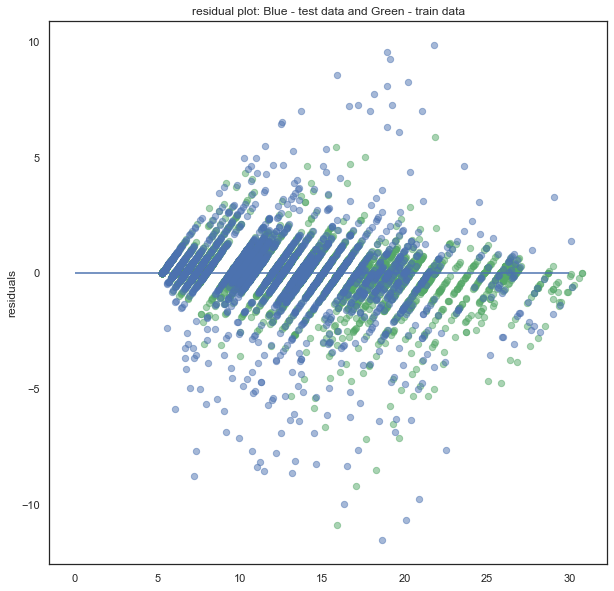

In [163]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 10, random_state=42)

evaluate(rf, train_features, test_features, train_labels, test_labels)

Model Performance
Accuracy(Train Data) = 76.98%.
Accuracy(Test Data) = 76.58%.


(76.97853141307029, 76.58486438296345)

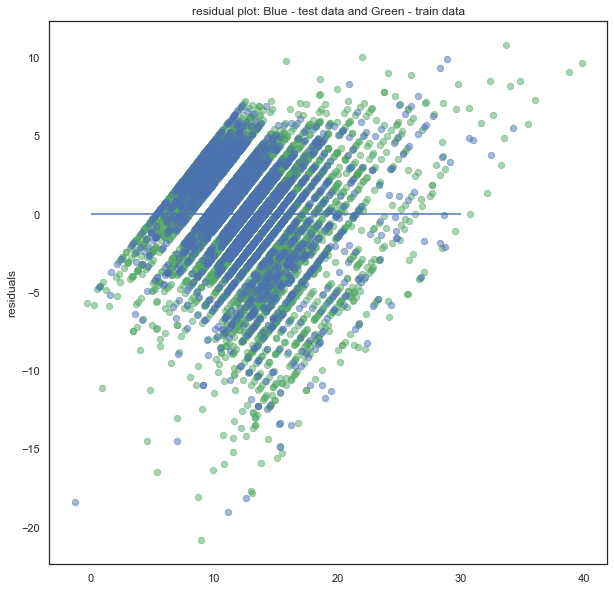

In [165]:
#train the linear regression model
lm = LinearRegression()

evaluate(lm, train_features, test_features, train_labels, test_labels)